# Compare Feature Selection Methods and Identify Overlapping Features
### Group 33, Florida Atlantic University
This notebook compares multiple feature selection methods applied to miRNA expression data for lung cancer classification. The goals are to:  
- Identify top-ranked features from each selection method  
- Quantify overlaps and agreement across methods  
- Generate consensus biomarkers based on shared selections  
- Save outputs for use in downstream classification models


> Imports and Folder Structure Setup

In [60]:
from pathlib import Path
import pandas as pd
import logging

# --- Logging Setup ---
logging.basicConfig(level=logging.INFO, format="%(asctime)s - %(levelname)s - %(message)s")

# --- Define Root Folder and Subdirectories ---
ROOT_DIR = Path("../results/pulmo_ml_pipeline")

FIGURE_DIR = ROOT_DIR / "figures"
PLOT_DATA_DIR = ROOT_DIR / "plot_data"
ANALYSIS_DIR = ROOT_DIR / "feature_analysis"
FILTERED_DIR = ROOT_DIR / "filtered_data"
SELECTION_DIR = ROOT_DIR / "feature_selection"  # Optional: raw FS method output

# --- Create All Folders ---
for path in [FIGURE_DIR, PLOT_DATA_DIR, ANALYSIS_DIR, FILTERED_DIR, SELECTION_DIR]:
    path.mkdir(parents=True, exist_ok=True)

# --- Confirm Working Environment ---
print("Notebook is running from:", Path().resolve())
print("Pulmo ML output will be saved under:", ROOT_DIR.resolve())

Notebook is running from: C:\Users\amaba\Documents\School\multiclass_lungcancer_classification_models\feature_selection
Pulmo ML output will be saved under: C:\Users\amaba\Documents\School\multiclass_lungcancer_classification_models\results\pulmo_ml_pipeline


> Load Feature Selection Results

In [61]:
# --- File Paths for Feature Selection Results ---
file_paths = {
    "fold_change": SELECTION_DIR / "fold_change_results.csv",
    "chi_squared": SELECTION_DIR / "chi_squared_features.csv",
    "information_gain": SELECTION_DIR / "information_gain_results.csv",
    "lasso": SELECTION_DIR / "lasso_results.csv",
    "nca": SELECTION_DIR / "nca_results.csv",
    "rfe": SELECTION_DIR / "recursive_feature_elimination" / "recursive_feature_selection_general.csv"
}

# --- Load Top-K Features From Each Method ---
def load_top_k_features(file_paths, num_features=500):
    feature_sets = {}

    print(f"\nLoading top {num_features} features from each selection method...\n")

    for key, path in file_paths.items():
        print(f"--- {key.upper()} ---")
        print(f"Looking for file: {path.as_posix()}")

        if not path.exists():
            logging.warning(f"[{key}] File not found: {path}")
            continue

        df = pd.read_csv(path)
        print(f"Loaded file: {path.name}")
        print(f"Columns: {list(df.columns)}")

        # Method-specific parsing
        if key == "fold_change" and "log2_fold_change" in df.columns:
            features = df.nlargest(num_features, "log2_fold_change")["Unnamed: 0"]
        elif key == "chi_squared" and "Score" in df.columns:
            features = df.nlargest(num_features, "Score")["Feature"]
        elif key == "information_gain" and "Info_Gain_General" in df.columns:
            features = df.nlargest(num_features, "Info_Gain_General")["Feature"]
        elif key == "lasso" and "Coefficient" in df.columns:
            features = df.nlargest(num_features, "Coefficient")["Feature"]
        elif key in ["nca", "rfe"] and "Feature" in df.columns:
            features = df["Feature"].head(num_features)
        else:
            logging.warning(f"[{key}] Unexpected file structure.")
            continue

        # Final cleanup
        features_clean = features.dropna().astype(str).unique()
        feature_sets[key] = set(features_clean)

        print(f"Top {len(features_clean)} features loaded from {key}.\n")

    all_unique = set().union(*feature_sets.values())
    print(f"Total unique features across all methods: {len(all_unique)}\n")

    return feature_sets, all_unique

# --- Execute Loader ---
feature_sets, top_features = load_top_k_features(file_paths, num_features=500)

2025-03-28 18:46:02,095 - WARNING - [fold_change] File not found: ..\results\pulmo_ml_pipeline\feature_selection\fold_change_results.csv
2025-03-28 18:46:02,099 - WARNING - [chi_squared] File not found: ..\results\pulmo_ml_pipeline\feature_selection\chi_squared_features.csv
2025-03-28 18:46:02,099 - WARNING - [information_gain] File not found: ..\results\pulmo_ml_pipeline\feature_selection\information_gain_results.csv
2025-03-28 18:46:02,099 - WARNING - [lasso] File not found: ..\results\pulmo_ml_pipeline\feature_selection\lasso_results.csv
2025-03-28 18:46:02,100 - WARNING - [nca] File not found: ..\results\pulmo_ml_pipeline\feature_selection\nca_results.csv
2025-03-28 18:46:02,100 - WARNING - [rfe] File not found: ..\results\pulmo_ml_pipeline\feature_selection\recursive_feature_elimination\recursive_feature_selection_general.csv



Loading top 500 features from each selection method...

--- FOLD_CHANGE ---
Looking for file: ../results/pulmo_ml_pipeline/feature_selection/fold_change_results.csv
--- CHI_SQUARED ---
Looking for file: ../results/pulmo_ml_pipeline/feature_selection/chi_squared_features.csv
--- INFORMATION_GAIN ---
Looking for file: ../results/pulmo_ml_pipeline/feature_selection/information_gain_results.csv
--- LASSO ---
Looking for file: ../results/pulmo_ml_pipeline/feature_selection/lasso_results.csv
--- NCA ---
Looking for file: ../results/pulmo_ml_pipeline/feature_selection/nca_results.csv
--- RFE ---
Looking for file: ../results/pulmo_ml_pipeline/feature_selection/recursive_feature_elimination/recursive_feature_selection_general.csv
Total unique features across all methods: 0



> File Paths and Feature Loader Function

In [62]:
# --- Feature Selection Result Files ---
file_paths = {
    "fold_change": RESULTS_DIR / "fold_change_results.csv",
    "chi_squared": RESULTS_DIR / "chi_squared_features.csv",
    "information_gain": RESULTS_DIR / "information_gain_results.csv",
    "lasso": RESULTS_DIR / "lasso_results.csv",
    "nca": RESULTS_DIR / "nca_results.csv",
    "rfe": RESULTS_DIR / "recursive_feature_elimination" / "recursive_feature_selection_general.csv"
}

# --- Load Top-K Features From Each Method ---
def load_top_k_features(file_paths, num_features=500):
    feature_sets = {}

    print(f"\nLoading top {num_features} features from each method...\n")

    for key, path in file_paths.items():
        print(f"--- {key.upper()} ---")
        print(f"Checking: {path.as_posix()}")

        if not path.exists():
            logging.warning(f"[{key}] File not found: {path.as_posix()}")
            continue

        df = pd.read_csv(path)
        print(f"Loaded file: {path.name}")
        print(f"Columns found: {list(df.columns)}")

        # Method-specific column handling
        if key == "fold_change" and "log2_fold_change" in df.columns:
            features = df.nlargest(num_features, "log2_fold_change")["Unnamed: 0"]
        elif key == "chi_squared" and "Score" in df.columns:
            features = df.nlargest(num_features, "Score")["Feature"]
        elif key == "information_gain" and "Info_Gain_General" in df.columns:
            features = df.nlargest(num_features, "Info_Gain_General")["Feature"]
        elif key == "lasso" and "Coefficient" in df.columns:
            features = df.nlargest(num_features, "Coefficient")["Feature"]
        elif key in ["nca", "rfe"] and "Feature" in df.columns:
            features = df["Feature"].head(num_features)
        else:
            logging.warning(f"[{key}] Unexpected format or missing expected column.")
            continue

        features_cleaned = features.dropna().astype(str).unique()
        feature_sets[key] = set(features_cleaned)

        print(f"Top {len(features_cleaned)} features loaded from {key}.\n")

    combined = set().union(*feature_sets.values())
    print(f"✓ Total unique features selected across all methods: {len(combined)}\n")

    return feature_sets, combined

# --- Execute Feature Loading ---
feature_sets, top_features = load_top_k_features(file_paths, num_features=500)

print("\n=== Feature Set Sizes ===")
for method, feats in feature_sets.items():
    print(f"{method:15}: {len(feats)} features")

print("\n=== Sample Feature Names ===")
for method, feats in feature_sets.items():
    print(f"\n{method}:")
    print(sorted(list(feats))[:5])


Loading top 500 features from each method...

--- FOLD_CHANGE ---
Checking: ../results/fold_change_results.csv
Loaded file: fold_change_results.csv
Columns found: ['Unnamed: 0', 'log2_fold_change', 'absolute_fold_change', 'regulation']
Top 500 features loaded from fold_change.

--- CHI_SQUARED ---
Checking: ../results/chi_squared_features.csv
Loaded file: chi_squared_features.csv
Columns found: ['Feature', 'Score']
Top 500 features loaded from chi_squared.

--- INFORMATION_GAIN ---
Checking: ../results/information_gain_results.csv
Loaded file: information_gain_results.csv
Columns found: ['Feature', 'Info_Gain_General', 'Info_Gain_Stage', 'Info_Gain_Subtype']
Top 500 features loaded from information_gain.

--- LASSO ---
Checking: ../results/lasso_results.csv
Loaded file: lasso_results.csv
Columns found: ['Feature', 'Coefficient']
Top 500 features loaded from lasso.

--- NCA ---
Checking: ../results/nca_results.csv
Loaded file: nca_results.csv
Columns found: ['Feature', 'Importance']
To

> Feature Inspection & Overlap Calculation

In [63]:
# --- Feature Set Preview ---
print("\n======================")
print("FEATURE SET PREVIEW")
print("======================")

for method, features in feature_sets.items():
    features_list = list(features)
    print(f"\n{method.upper()} — Total Features: {len(features_list)}")
    print(f"Sample Features: {features_list[:5]}")

# --- Format Check ---
print("\n======================")
print("FEATURE FORMAT CHECK")
print("======================")

for method, features in feature_sets.items():
    if features:
        example = list(features)[0]
        print(f"{method}: Example = {example} (type: {type(example)})")
    else:
        print(f"{method}: No features found.")

# --- Pairwise Overlap and Jaccard Similarity ---
print("\n===============================")
print("PAIRWISE FEATURE SET OVERLAP")
print("===============================")

method_keys = sorted(feature_sets.keys())

for i in range(len(method_keys)):
    for j in range(i + 1, len(method_keys)):
        method1, method2 = method_keys[i], method_keys[j]
        set1, set2 = feature_sets[method1], feature_sets[method2]
        overlap = len(set1 & set2)
        union = len(set1 | set2)
        jaccard = (overlap / union) * 100 if union > 0 else 0.0

        print(f"{method1} ∩ {method2}: {overlap} features ({jaccard:.2f}% Jaccard similarity)")



FEATURE SET PREVIEW

FOLD_CHANGE — Total Features: 500
Sample Features: ['hsa-mir-6849', 'hsa-mir-1269a', 'hsa-mir-1911', 'hsa-mir-4651', 'hsa-mir-5194']

CHI_SQUARED — Total Features: 500
Sample Features: ['hsa-mir-6849', 'hsa-mir-1269a', 'hsa-mir-4537', 'hsa-mir-1272', 'hsa-mir-4651']

INFORMATION_GAIN — Total Features: 500
Sample Features: ['hsa-mir-6849', 'hsa-mir-196b', 'hsa-mir-639', 'hsa-mir-154', 'hsa-mir-4260']

LASSO — Total Features: 500
Sample Features: ['hsa-mir-4766', 'hsa-mir-196b', 'hsa-mir-3143', 'hsa-mir-591', 'hsa-mir-4260']

NCA — Total Features: 500
Sample Features: ['hsa-mir-34c', 'hsa-mir-1272', 'hsa-mir-4651', 'hsa-mir-5194', 'hsa-mir-761']

RFE — Total Features: 50
Sample Features: ['hsa-mir-5094', 'hsa-mir-4661', 'hsa-mir-8085', 'hsa-mir-4733', 'hsa-mir-186']

FEATURE FORMAT CHECK
fold_change: Example = hsa-mir-6849 (type: <class 'str'>)
chi_squared: Example = hsa-mir-6849 (type: <class 'str'>)
information_gain: Example = hsa-mir-6849 (type: <class 'str'>)
la

> Consensus Feature Selection (Overlap-Based)

In [64]:
from collections import Counter

# --- Minimum # of Methods for Consensus ---
min_overlap = 3  # Change to 4, 5, 6, or 7 for stricter panels

print("\n===============================")
print(f"BUILDING CONSENSUS FEATURE PANEL (Selected by ≥{min_overlap} Methods)")
print("===============================")

# --- Count feature frequency across all methods ---
feature_counter = Counter()
for method, feature_set in feature_sets.items():
    feature_counter.update(feature_set)
    print(f"{method}: {len(feature_set)} features counted.")

# --- Filter by overlap threshold ---
overlapping_features = {
    feature for feature, count in feature_counter.items()
    if count >= min_overlap
}

# --- Display summary ---
print(f"\nTotal unique features across all methods: {len(feature_counter)}")
print(f"Features selected by ≥{min_overlap} methods: {len(overlapping_features)}")

print("\nSample overlapping features:")
for feature in list(overlapping_features)[:5]:
    print(f" - {feature}")

# --- Save consensus features ---
overlap_df = pd.DataFrame({'Feature': sorted(overlapping_features)})
output_path = ANALYSIS_DIR / f"overlapping_features_min{min_overlap}.csv"
overlap_df.to_csv(output_path, index=False)

print(f"\n Consensus feature set saved to: {output_path}")


BUILDING CONSENSUS FEATURE PANEL (Selected by ≥3 Methods)
fold_change: 500 features counted.
chi_squared: 500 features counted.
information_gain: 500 features counted.
lasso: 500 features counted.
nca: 500 features counted.
rfe: 50 features counted.

Total unique features across all methods: 1288
Features selected by ≥3 methods: 363

Sample overlapping features:
 - hsa-mir-6849
 - hsa-mir-1272
 - hsa-mir-4651
 - hsa-mir-761
 - hsa-mir-4744

 Consensus feature set saved to: ..\results\pulmo_ml_pipeline\feature_analysis\overlapping_features_min3.csv


> Filter Dataset by Consensus Features

In [65]:
import numpy as np

# --- Load Full Dataset ---
data_path = Path("../processed_data/miRNA_stage_subtype.csv")
print(f"\nLoading full dataset from: {data_path.resolve()}")
processed_data = pd.read_csv(data_path)

# --- Check Consensus Feature List ---
if not overlapping_features:
    raise ValueError("No overlapping features found. Check previous step.")

feature_list = list(overlapping_features)

# --- Check if All Features Are Present in Dataset ---
missing = [f for f in feature_list if f not in processed_data.columns]
if missing:
    logging.warning(f"Missing features in dataset: {missing}")

# --- Filter Available Features ---
available_features = [f for f in feature_list if f in processed_data.columns]
expression_values = processed_data[available_features]
labels = processed_data["stage"]

# --- Pre-filter Summary ---
print("\nTarget distribution BEFORE filtering:")
print(labels.value_counts())

print("\nMissing Data Summary:")
print(f"- Total samples: {len(processed_data)}")
print(f"- Selected features: {len(available_features)}")
print(f"- Features with missing values: {expression_values.isnull().any().sum()}")
print(f"- Samples with missing values: {expression_values.isnull().any(axis=1).sum()}")

# --- Drop Rows with Missing Data ---
if expression_values.isnull().values.any() or labels.isnull().values.any():
    logging.warning("Dropping rows with missing expression values or labels.")
    mask = ~expression_values.isnull().any(axis=1) & ~labels.isnull()
    expression_values = expression_values[mask]
    labels = labels[mask]

# --- Final Shape ---
print("\nFinal dataset shape:")
print(f"- Expression matrix: {expression_values.shape}")
print(f"- Target labels: {labels.shape}")

print("\nTarget distribution AFTER filtering:")
print(labels.value_counts())

# --- Optional Summary Statistics ---
print("\nSummary stats for selected features:")
print(expression_values.describe().transpose())

# --- Save Clean Filtered Dataset ---
filtered_df = expression_values.copy()
filtered_df["stage"] = labels
output_path = FILTERED_DIR / f"filtered_miRNA_stage_data_min{min_overlap}.csv"
filtered_df.to_csv(output_path, index=False)

print(f"\nFiltered dataset saved to: {output_path}")


Loading full dataset from: C:\Users\amaba\Documents\School\multiclass_lungcancer_classification_models\processed_data\miRNA_stage_subtype.csv

Target distribution BEFORE filtering:
stage
1    566
2    308
3    175
4     31
0     11
Name: count, dtype: int64

Missing Data Summary:
- Total samples: 1091
- Selected features: 363
- Features with missing values: 0
- Samples with missing values: 0

Final dataset shape:
- Expression matrix: (1091, 363)
- Target labels: (1091,)

Target distribution AFTER filtering:
stage
1    566
2    308
3    175
4     31
0     11
Name: count, dtype: int64

Summary stats for selected features:
               count      mean       std  min  25%  50%       75%       max
hsa-mir-6849  1091.0  0.032764  0.144983  0.0  0.0  0.0  0.000000  2.873617
hsa-mir-1272  1091.0  0.000703  0.011986  0.0  0.0  0.0  0.000000  0.260922
hsa-mir-4651  1091.0  0.051214  0.160605  0.0  0.0  0.0  0.000000  2.297845
hsa-mir-761   1091.0  0.000573  0.013395  0.0  0.0  0.0  0.000000  

> UpSet Plot: Global Overlap


Generating UpSet plot...
✓ UpSet plot saved to: ..\results\pulmo_ml_pipeline\figures\global_feature_overlap_upset.png


<Figure size 1200x800 with 0 Axes>

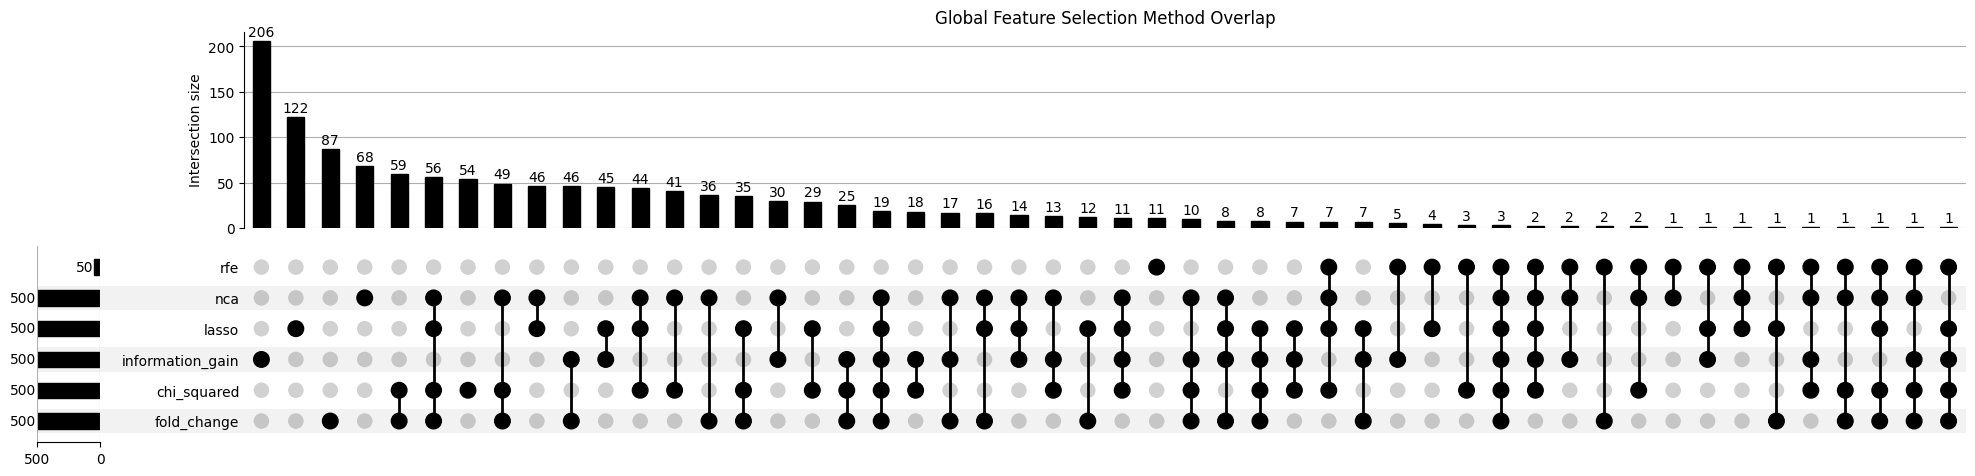

pSet data saved to: ..\results\pulmo_ml_pipeline\plot_data\upset_combinations.csv


In [66]:
import matplotlib.pyplot as plt
from upsetplot import plot

# --- Prepare Data for UpSet Plot ---
print("\nGenerating UpSet plot...")

all_features = set.union(*feature_sets.values())

# Create a binary presence matrix per feature per method
upset_records = [
    {method: int(feature in features) for method, features in feature_sets.items()}
    for feature in all_features
]
df_upset = pd.DataFrame(upset_records)
combo_counts = df_upset.value_counts()

# --- Plot ---
plt.figure(figsize=(12, 8))
plot(combo_counts, sort_by="cardinality", show_counts=True)
plt.title("Global Feature Selection Method Overlap")

# --- Save Plot ---
upset_fig_path = FIGURE_DIR / "global_feature_overlap_upset.png"
plt.savefig(upset_fig_path, bbox_inches='tight', dpi=300)
print(f"✓ UpSet plot saved to: {upset_fig_path}")
plt.show()

# --- Save Underlying Data ---
upset_data_path = PLOT_DATA_DIR / "upset_combinations.csv"
combo_counts.to_csv(upset_data_path)
print(f"pSet data saved to: {upset_data_path}")

> Heatmap: Pairwise Overlap Counts


Generating pairwise feature overlap heatmap...
✓ Pairwise heatmap saved to: ..\results\pulmo_ml_pipeline\figures\pairwise_overlap_matrix.png


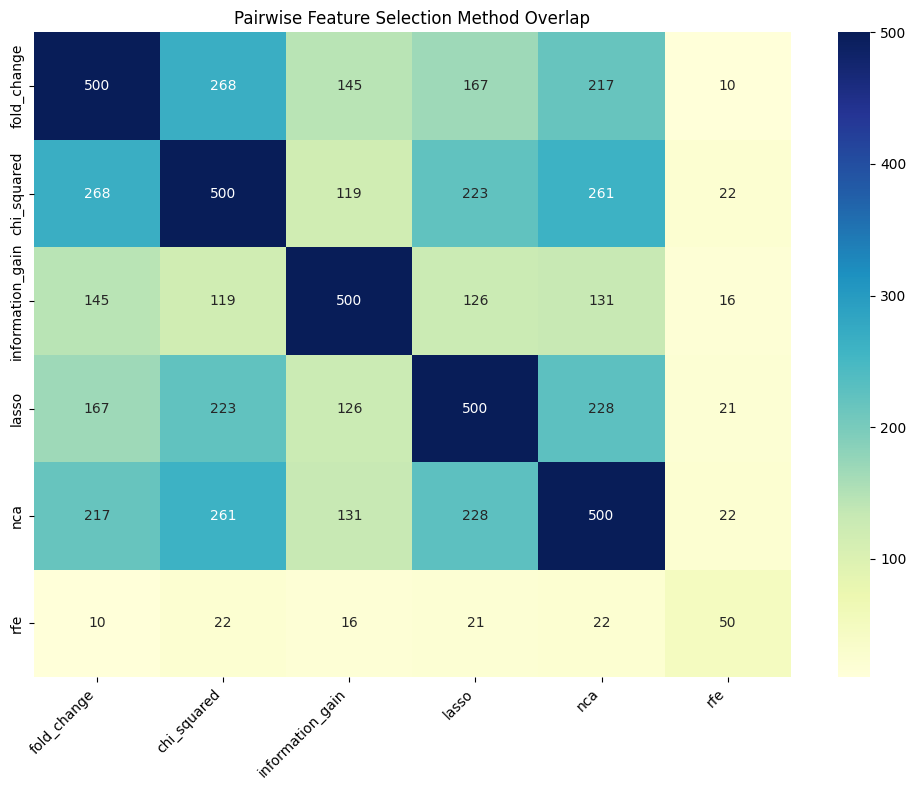

Pairwise overlap matrix saved to: ..\results\pulmo_ml_pipeline\plot_data\pairwise_overlap_matrix.csv


In [67]:
import seaborn as sns
import numpy as np

# --- Generate Pairwise Overlap Matrix ---
print("\nGenerating pairwise feature overlap heatmap...")

methods = list(feature_sets.keys())
overlap_matrix = np.zeros((len(methods), len(methods)), dtype=int)

for i, m1 in enumerate(methods):
    for j, m2 in enumerate(methods):
        overlap_matrix[i, j] = len(feature_sets[m1] & feature_sets[m2])

# --- Create DataFrame for Heatmap ---
overlap_df = pd.DataFrame(overlap_matrix, index=methods, columns=methods)

# --- Plot Heatmap ---
plt.figure(figsize=(10, 8))
sns.heatmap(overlap_df, annot=True, fmt='g', cmap='YlGnBu')
plt.title("Pairwise Feature Selection Method Overlap")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# --- Save Plot ---
heatmap_path = FIGURE_DIR / "pairwise_overlap_matrix.png"
plt.savefig(heatmap_path, bbox_inches='tight', dpi=300)
print(f"✓ Pairwise heatmap saved to: {heatmap_path}")
plt.show()

# --- Save Matrix as CSV ---
heatmap_data_path = PLOT_DATA_DIR / "pairwise_overlap_matrix.csv"
overlap_df.to_csv(heatmap_data_path)
print(f"Pairwise overlap matrix saved to: {heatmap_data_path}")

> Venn Diagrams (with CSV Export)


Generating Venn diagram: Fold-Change, Chi-Squared, Information Gain
Venn diagram saved to: ..\results\pulmo_ml_pipeline\figures\venn_fc_chi2_ig.png


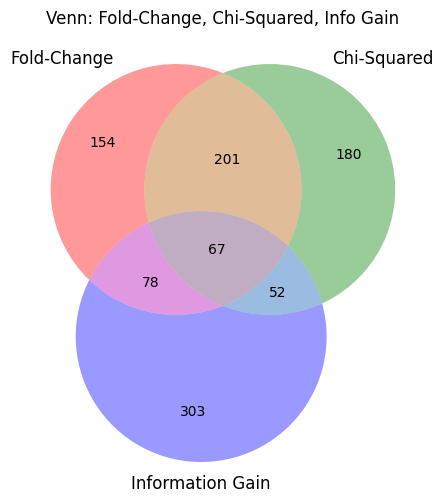


Generating Venn diagram: Fold-Change, RFE, NCA
Venn diagram saved to: ..\results\pulmo_ml_pipeline\figures\venn_fc_rfe_nca.png


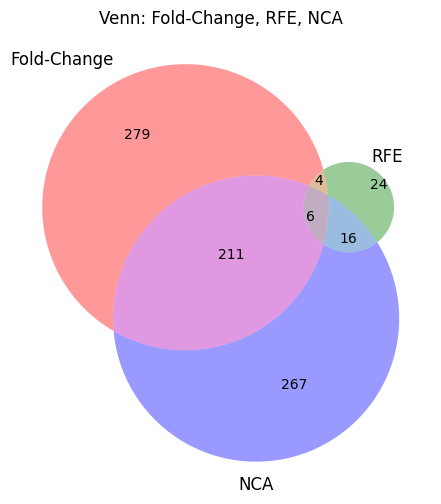

Venn 1 raw features saved to: ..\results\pulmo_ml_pipeline\plot_data\venn_fc_chi2_ig_features.csv
Venn 2 raw features saved to: ..\results\pulmo_ml_pipeline\plot_data\venn_fc_rfe_nca_features.csv


In [69]:
from matplotlib_venn import venn3

# --- Venn 1: Fold-Change, Chi-Squared, Information Gain ---
print("\nGenerating Venn diagram: Fold-Change, Chi-Squared, Information Gain")

venn1_sets = {
    "Fold-Change": feature_sets["fold_change"],
    "Chi-Squared": feature_sets["chi_squared"],
    "Information Gain": feature_sets["information_gain"]
}

venn1_counts = (
    len(venn1_sets["Fold-Change"] - venn1_sets["Chi-Squared"] - venn1_sets["Information Gain"]),
    len(venn1_sets["Chi-Squared"] - venn1_sets["Fold-Change"] - venn1_sets["Information Gain"]),
    len((venn1_sets["Fold-Change"] & venn1_sets["Chi-Squared"]) - venn1_sets["Information Gain"]),
    len(venn1_sets["Information Gain"] - venn1_sets["Fold-Change"] - venn1_sets["Chi-Squared"]),
    len((venn1_sets["Fold-Change"] & venn1_sets["Information Gain"]) - venn1_sets["Chi-Squared"]),
    len((venn1_sets["Chi-Squared"] & venn1_sets["Information Gain"]) - venn1_sets["Fold-Change"]),
    len(venn1_sets["Fold-Change"] & venn1_sets["Chi-Squared"] & venn1_sets["Information Gain"])
)

plt.figure(figsize=(7, 6))
venn3(subsets=venn1_counts, set_labels=tuple(venn1_sets.keys()))
plt.title("Venn: Fold-Change, Chi-Squared, Info Gain")
venn1_path = FIGURE_DIR / "venn_fc_chi2_ig.png"
plt.savefig(venn1_path, bbox_inches='tight', dpi=300)
print(f"Venn diagram saved to: {venn1_path}")
plt.show()


# --- Venn 2: Fold-Change, RFE, NCA ---
print("\nGenerating Venn diagram: Fold-Change, RFE, NCA")

venn2_sets = {
    "Fold-Change": feature_sets["fold_change"],
    "RFE": feature_sets["rfe"],
    "NCA": feature_sets["nca"]
}

venn2_counts = (
    len(venn2_sets["Fold-Change"] - venn2_sets["RFE"] - venn2_sets["NCA"]),
    len(venn2_sets["RFE"] - venn2_sets["Fold-Change"] - venn2_sets["NCA"]),
    len((venn2_sets["Fold-Change"] & venn2_sets["RFE"]) - venn2_sets["NCA"]),
    len(venn2_sets["NCA"] - venn2_sets["Fold-Change"] - venn2_sets["RFE"]),
    len((venn2_sets["Fold-Change"] & venn2_sets["NCA"]) - venn2_sets["RFE"]),
    len((venn2_sets["RFE"] & venn2_sets["NCA"]) - venn2_sets["Fold-Change"]),
    len(venn2_sets["Fold-Change"] & venn2_sets["RFE"] & venn2_sets["NCA"])
)

plt.figure(figsize=(7, 6))
venn3(subsets=venn2_counts, set_labels=tuple(venn2_sets.keys()))
plt.title("Venn: Fold-Change, RFE, NCA")
venn2_path = FIGURE_DIR / "venn_fc_rfe_nca.png"
plt.savefig(venn2_path, bbox_inches='tight', dpi=300)
print(f"Venn diagram saved to: {venn2_path}")
plt.show()


# --- Save Raw Sets to CSV (Padded to Same Length) ---
def pad_sets_for_csv(set_dict):
    max_len = max(len(s) for s in set_dict.values())
    return {
        k: list(sorted(v)) + [None] * (max_len - len(v))
        for k, v in set_dict.items()
    }

venn1_df = pd.DataFrame(pad_sets_for_csv(venn1_sets))
venn2_df = pd.DataFrame(pad_sets_for_csv(venn2_sets))

venn1_csv = PLOT_DATA_DIR / "venn_fc_chi2_ig_features.csv"
venn2_csv = PLOT_DATA_DIR / "venn_fc_rfe_nca_features.csv"

venn1_df.to_csv(venn1_csv, index=False)
venn2_df.to_csv(venn2_csv, index=False)

print(f"Venn 1 raw features saved to: {venn1_csv}")
print(f"Venn 2 raw features saved to: {venn2_csv}")

> Rank Most Frequently Selected miRNAs

In [70]:
from collections import Counter

print("\nRanking miRNAs by frequency of selection across all methods...")

# --- Count frequency of each feature across all methods ---
feature_counter = Counter()
for method, features in feature_sets.items():
    feature_counter.update(features)
    print(f"{method}: {len(features)} features counted.")

# --- Create DataFrame with all frequencies ---
miRNA_occurrences_df = pd.DataFrame.from_dict(feature_counter, orient='index', columns=["Frequency"])
miRNA_occurrences_df = miRNA_occurrences_df.sort_values(by="Frequency", ascending=False)

# --- Save full frequency table ---
occurrences_path = ANALYSIS_DIR / "miRNA_occurrences.csv"
miRNA_occurrences_df.to_csv(occurrences_path)
print(f"✓ Full frequency table saved to: {occurrences_path}")

# --- Filter to high-confidence miRNAs (e.g. found in ≥5 methods) ---
min_methods = 5
top_overlap = {feature: count for feature, count in feature_counter.items() if count >= min_methods}

top_overlap_df = pd.DataFrame.from_dict(top_overlap, orient='index', columns=["Frequency"])
top_overlap_df = top_overlap_df.sort_values(by="Frequency", ascending=False)

top_path = ANALYSIS_DIR / f"top_overlapping_miRNAs_min{min_methods}.csv"
top_overlap_df.to_csv(top_path)
print(f"✓ Top overlapping miRNAs (≥{min_methods} methods) saved to: {top_path}")

# --- Console Preview ---
print(f"\nTop overlapping miRNAs (found in ≥{min_methods} methods):")
print(top_overlap_df.head(10))


Ranking miRNAs by frequency of selection across all methods...
fold_change: 500 features counted.
chi_squared: 500 features counted.
information_gain: 500 features counted.
lasso: 500 features counted.
nca: 500 features counted.
rfe: 50 features counted.
✓ Full frequency table saved to: ..\results\pulmo_ml_pipeline\feature_analysis\miRNA_occurrences.csv
✓ Top overlapping miRNAs (≥5 methods) saved to: ..\results\pulmo_ml_pipeline\feature_analysis\top_overlapping_miRNAs_min5.csv

Top overlapping miRNAs (found in ≥5 methods):
                Frequency
hsa-mir-5690            6
hsa-mir-3688-1          6
hsa-mir-6811            6
hsa-mir-6080            5
hsa-mir-548ak           5
hsa-mir-5704            5
hsa-mir-5192            5
hsa-mir-4642            5
hsa-mir-4264            5
hsa-mir-3125            5


> Horizontal Bar Plot of Top miRNAs


Generating bar plot of top miRNAs...


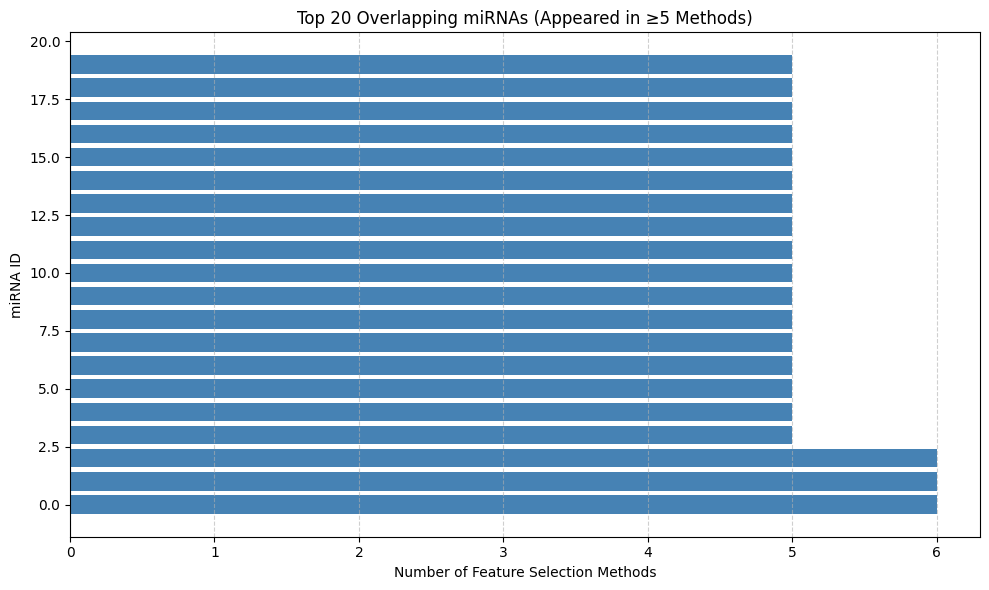

Bar plot saved to: ..\results\pulmo_ml_pipeline\figures\top_miRNA_frequency_barplot.png


In [72]:
import matplotlib.pyplot as plt

print("\nGenerating bar plot of top miRNAs...")

# Load from saved CSV to keep things consistent
top_path = ANALYSIS_DIR / f"top_overlapping_miRNAs_min{min_methods}.csv"
top_overlap_df = pd.read_csv(top_path)

# Select top N to visualize
top_n = 20
top_subset = top_overlap_df.head(top_n)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(top_subset.index[::-1], top_subset["Frequency"][::-1], color="steelblue")
plt.xlabel("Number of Feature Selection Methods")
plt.ylabel("miRNA ID")
plt.title(f"Top {top_n} Overlapping miRNAs (Appeared in ≥{min_methods} Methods)")
plt.grid(axis='x', linestyle="--", alpha=0.6)

# Save plot
barplot_path = FIGURE_DIR / f"top_miRNA_frequency_barplot.png"
plt.tight_layout()
plt.savefig(barplot_path, dpi=300)
plt.show()

print(f"Bar plot saved to: {barplot_path}")